# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [41]:
df = pd.read_csv(r'marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [42]:
#Shape
df.shape

(2240, 27)

In [43]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [44]:
df.isnull().sum()/len(df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [ ]:
#Income has 1.07% of missing values

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [45]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [ ]:
# no duplicates present in dataset

### 5. Drop the columns which you think redundant for the analysis 

In [46]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [47]:
df = df.drop(['ID','Dt_Customer'], axis=1)

In [10]:
#Dropping ID and Dt_Customer since those are the only columns that seems may not be used for clustering

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [48]:
#Unique categories in column Marital_Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [49]:
#Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [50]:
#Group categories 'Married', 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')

In [51]:
df['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [52]:
column_series = pd.Series(df.columns)

In [53]:
req_columns = column_series[column_series.str.contains('Mnt')].values.tolist()

In [54]:
df['Total_Expenses'] = df[req_columns].sum(axis=1)

In [55]:
df['Total_Expenses']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [56]:
column_series = pd.Series(df.columns)

In [57]:
req_columns = column_series[column_series.str.contains('Num.*Purchases')].values.tolist()

In [58]:
df['Num_Total_Purchases'] = df[req_columns].sum(axis=1)

In [59]:
df['Num_Total_Purchases']

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [60]:
column_series = pd.Series(df.columns)

In [61]:
req_columns = column_series[column_series.str.contains('home')].values.tolist()

In [62]:
df['Kids'] = df[req_columns].sum(axis=1)

In [63]:
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [64]:
column_series = pd.Series(df.columns)

In [65]:
req_columns = column_series[column_series.str.contains('(AcceptedCmp|Response)')].values.tolist()

C:\Users\user\AppData\Local\Temp\ipykernel_2404\2581520893.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  req_columns = column_series[column_series.str.contains('(AcceptedCmp|Response)')].values.tolist()


In [66]:
df['TotalAcceptedCmp'] = df[req_columns].sum(axis=1)

In [67]:
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

### 11. Drop those columns which we have used above for obtaining new features

In [68]:
df = df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome','Teenhome','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'],axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 192.6+ KB


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [70]:
import datetime

In [71]:
df['age'] = datetime.datetime.today().year - df['Year_Birth']

In [72]:
df['age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: age, Length: 2240, dtype: int64

### 13. Encode the categorical variables in the dataset

In [73]:
##Label encoding
from sklearn.preprocessing import LabelEncoder
cate = ['Education','Marital_Status']

In [74]:
lbl_encode = LabelEncoder()

In [75]:
for i in cate:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)


In [76]:
df['Income'] = df['Income'].fillna(0)

In [77]:
df.info()
## The label encoder has been applied to Education and Marital_Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   int32  
 2   Marital_Status       2240 non-null   int32  
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumWebVisitsMonth    2240 non-null   int64  
 6   Complain             2240 non-null   int64  
 7   Total_Expenses       2240 non-null   int64  
 8   Num_Total_Purchases  2240 non-null   int64  
 9   Kids                 2240 non-null   int64  
 10  TotalAcceptedCmp     2240 non-null   int64  
 11  age                  2240 non-null   int64  
dtypes: float64(1), int32(2), int64(9)
memory usage: 192.6 KB


### 14. Standardize the columns, so that values are in a particular range

In [78]:
from sklearn.preprocessing import StandardScaler

#Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [42]:
scaled_features_df

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,-0.985345,-0.350141,-1.346874,0.251939,0.307039,0.693904,-0.097282,1.679417,1.320826,-1.264505,0.621248,0.985345
1,-1.235733,-0.350141,-1.346874,-0.208699,-0.383664,-0.130463,-0.097282,-0.961275,-1.154596,1.396361,-0.501912,1.235733
2,-0.317643,-0.350141,0.742460,0.778231,-0.798086,-0.542647,-0.097282,0.282673,0.799685,-1.264505,-0.501912,0.317643
3,1.268149,-0.350141,0.742460,-0.978043,-0.798086,0.281720,-0.097282,-0.918094,-0.894025,0.065928,-0.501912,-1.268149
4,1.017761,1.428354,0.742460,0.257992,1.550305,-0.130463,-0.097282,-0.305254,0.539114,0.065928,-0.501912,-1.017761
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.350141,0.742460,0.372429,-0.107383,-0.130463,-0.097282,1.221032,0.408829,0.065928,-0.501912,0.150717
2236,-1.903435,1.428354,0.742460,0.481437,0.237969,0.693904,-0.097282,-0.268717,0.929970,2.726794,0.621248,1.903435
2237,1.017761,-0.350141,-1.346874,0.206750,1.446700,0.281720,-0.097282,1.054951,0.539114,-1.264505,0.621248,-1.017761
2238,-1.068807,0.539106,0.742460,0.685744,-1.419719,-0.954831,-0.097282,0.393948,1.060255,0.065928,-0.501912,1.068807


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [79]:
##Step 1
cov_matrix = np.cov(scaled_features_df.T)
cov_matrix

array([[ 1.00044663, -0.17146685,  0.0042384 , -0.15496032, -0.01987996,
         0.12119336, -0.030141  , -0.11135611, -0.16837908, -0.09023955,
         0.00830618, -1.00044663],
       [-0.17146685,  1.00044663, -0.01375403,  0.11771325, -0.01173369,
        -0.04029882, -0.05056252,  0.09209518,  0.09405439,  0.05321304,
         0.06327892,  0.17146685],
       [ 0.0042384 , -0.01375403,  1.00044663,  0.00733686, -0.00450972,
         0.00344176, -0.00520466, -0.01775232,  0.00671037,  0.03917598,
        -0.06004206, -0.0042384 ],
       [-0.15496032,  0.11771325,  0.00733686,  1.00044663, -0.01060766,
        -0.53569091, -0.02449955,  0.65444582,  0.55599284, -0.29306798,
         0.2845784 ,  0.15496032],
       [-0.01987996, -0.01173369, -0.00450972, -0.01060766,  1.00044663,
        -0.02145427,  0.01323699,  0.02044173,  0.00574294,  0.01806145,
        -0.08900203,  0.01987996],
       [ 0.12119336, -0.04029882,  0.00344176, -0.53569091, -0.02145427,
         1.00044663,  

In [80]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('\n')
print('eigein vectors','\n',eig_vectors)

eigein vals: 
 [3.23881961e+00 2.03995544e+00 8.45752172e-16 1.59583545e-01
 3.51444368e-01 5.75880710e-01 7.52897095e-01 8.43979014e-01
 1.07697756e+00 9.38408269e-01 1.02612769e+00 1.00128623e+00]


eigein vectors 
 [[-1.83810041e-01  6.43904168e-01 -7.07106781e-01  4.45389902e-03
  -2.37180569e-02 -3.91239877e-02 -1.09591094e-01  8.34426139e-02
   2.77578169e-02 -1.54677920e-01 -6.90842860e-02  3.23566108e-02]
 [ 9.75498944e-02 -1.91105254e-01 -2.70637618e-17  1.32727159e-02
  -1.97736909e-02  1.20976251e-01  2.04046065e-01  5.04037717e-01
   4.52697356e-01 -5.68461199e-01 -2.59757548e-01  2.17978326e-01]
 [-1.53482016e-02 -1.36362157e-02  4.33240385e-17  3.76584377e-04
  -5.59993387e-03  4.88930800e-03  2.36323477e-01 -1.08396963e-01
  -2.46515587e-01 -1.46470783e-01 -6.63639815e-01 -6.39752267e-01]
 [ 4.43475222e-01  4.85274310e-02  5.38297767e-17  9.58122926e-02
   7.34876436e-01 -3.86718095e-01 -2.78422373e-01  1.09417551e-01
  -4.50149897e-02 -5.96214492e-02 -7.92065385e-02 -2.

In [81]:
## Step3: Scree plot.
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained: ', cum_var_exp)

Explained Variance:  [26.978114273143134, 16.992039541582724, 8.970806376511215, 8.547246683013615, 8.34032686728013, 7.816577810006013, 7.030018645310595, 6.271341502288795, 4.796863507287491, 2.9273956114092408, 1.329269182167034, 7.044788367960385e-15]
Cummulative Variance Explained:  [ 26.97811427  43.97015381  52.94096019  61.48820687  69.82853374
  77.64511155  84.6751302   90.9464717   95.74333521  98.67073082
 100.         100.        ]


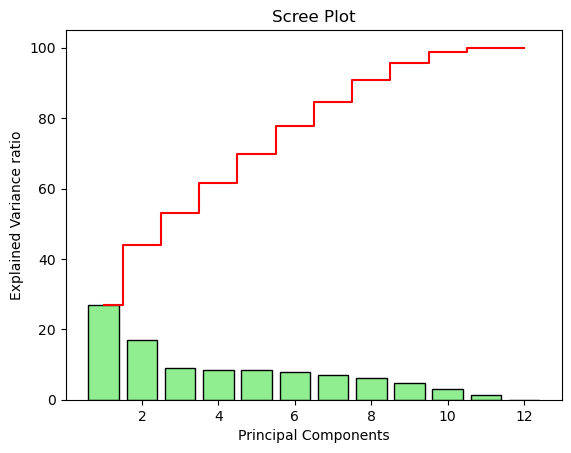

In [82]:
## Scree plot.
plt.bar(range(1,len(var_exp)+1),var_exp, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(1,len(var_exp)+1),cum_var_exp, where='mid', color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')
#plt.legend(loc='best')
plt.show()


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [83]:
## Using the dimensions obtained from the PCA to apply clustering. (i.e, 8)
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()                      

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.146275,0.512454,-0.213800,1.193059,-0.865210,-0.327279,1.203470,0.046620
1,-1.120001,2.119625,-0.328601,0.997162,-0.561630,-0.981300,-0.262883,0.479410
2,1.347821,-0.092137,0.348886,-0.397667,0.986145,-0.885303,-0.502595,0.142480
3,-2.035243,-1.408013,-0.184613,-0.461245,0.833457,-0.322182,-0.471964,-0.141235
4,-0.161638,-0.870050,0.617296,-1.501085,-0.895169,1.688946,-0.637821,0.012793


#### Kmeans Clustering using PCA transformed data

In [84]:
## finding optimal k value by KMeans clustering using Elbow plot
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

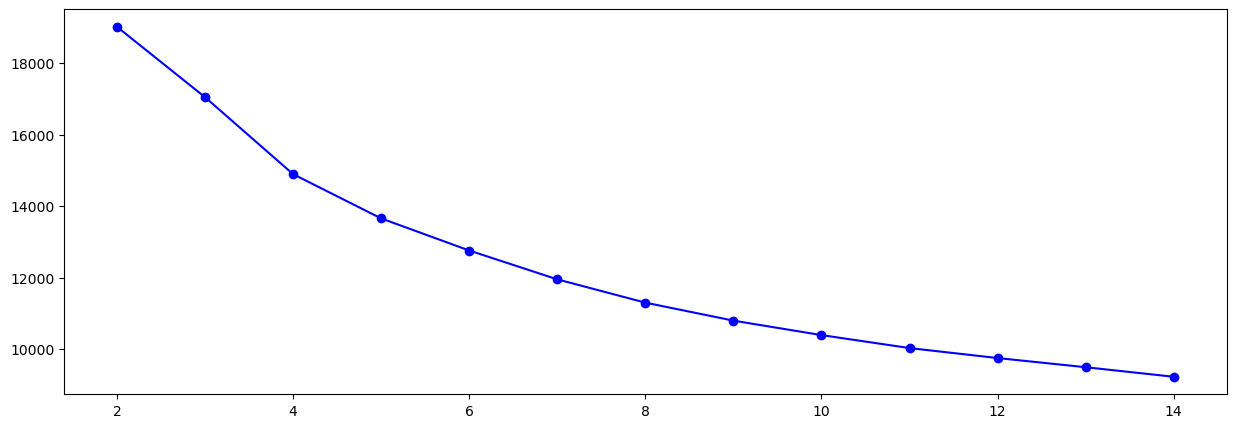

In [85]:
### creating a dataframe of number of clusters and cluster errors.
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

## Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [ ]:
## From the above elbow plot we can see at the cluster k=3, the inertia significantly decreases. Hence we can select our optimal clusters as K=3

In [86]:
##Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [87]:
## Creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])

In [88]:
## joining the label dataframe to the pca_f dataframe
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,2.146275,0.512454,-0.213800,1.193059,-0.865210,-0.327279,1.203470,0.046620,0
1,-1.120001,2.119625,-0.328601,0.997162,-0.561630,-0.981300,-0.262883,0.479410,2
2,1.347821,-0.092137,0.348886,-0.397667,0.986145,-0.885303,-0.502595,0.142480,0
3,-2.035243,-1.408013,-0.184613,-0.461245,0.833457,-0.322182,-0.471964,-0.141235,1
4,-0.161638,-0.870050,0.617296,-1.501085,-0.895169,1.688946,-0.637821,0.012793,1


In [89]:
kmeans_df['Label'].value_counts()

1    863
0    717
2    660
Name: Label, dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


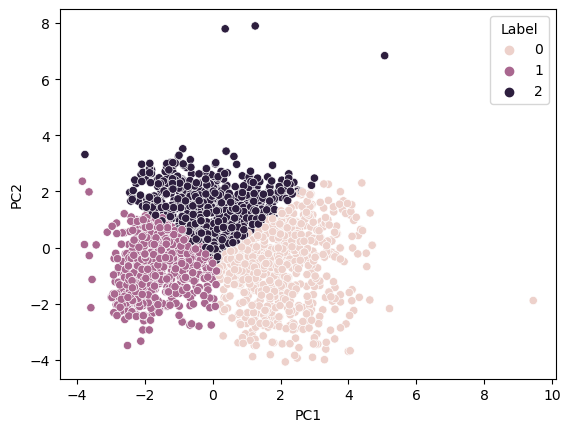

In [90]:
## Visualing the clusters formed
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

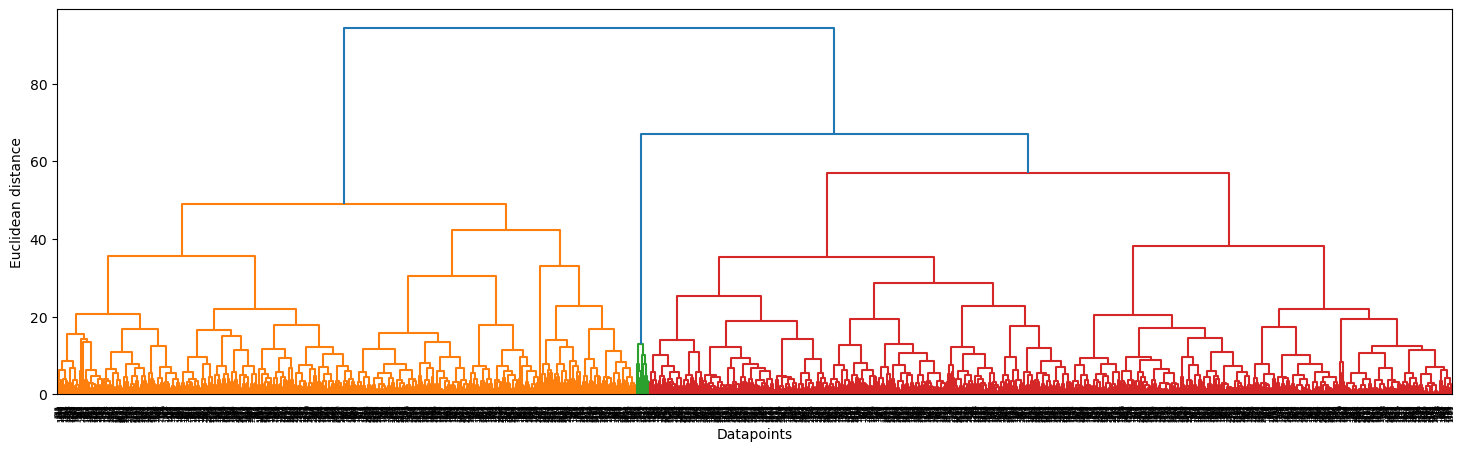

In [91]:
## Agglomerative clustering using the original data
from scipy.cluster.hierarchy import dendrogram, linkage


plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
## Computing silhoutte score for agglomerative clustering

In [92]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [93]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df, labels))

2 0.1703582032540823
3 0.18139391162505164
4 0.11089097187855881
5 0.10740036531614083
6 0.10409248341348637
7 0.09376869046686055
8 0.09872443547962995
9 0.10269100878035349
10 0.10396470049892169
11 0.0997965567382833
12 0.10340233175067287
13 0.10530188299220701
14 0.10533529416308689


In [94]:
## Building hierarchical clustering model using the optimal clusters as 3 using original data

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_features_df)

In [95]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,1
3,0
4,0


In [97]:
## joining the label dataframe with unscaled initial cleaned dataframe .(dfc)

df_hier = df.join(df_label1)
df_hier.head()

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Labels
0,1957,2,0,58138.0,58,7,0,1617,25,0,1,66,1
1,1954,2,0,46344.0,38,5,0,27,6,2,0,69,0
2,1965,2,1,71613.0,26,4,0,776,21,0,0,58,1
3,1984,2,1,26646.0,26,6,0,53,8,1,0,39,0
4,1981,4,1,58293.0,94,5,0,422,19,1,0,42,0


### Visualization and Interpretation of results

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


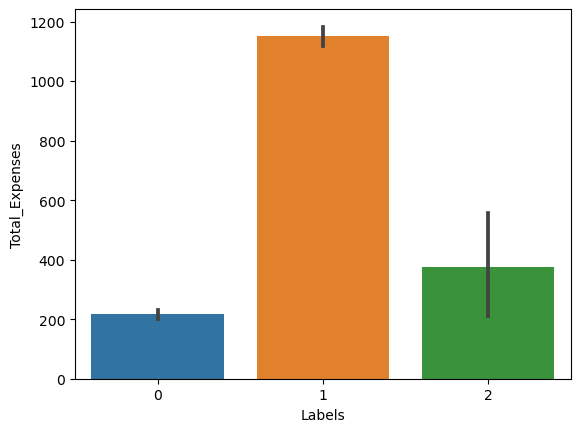

In [98]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

In [ ]:
## The total expense for the cluster 1 is much higher compared to cluster 0 and 2

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


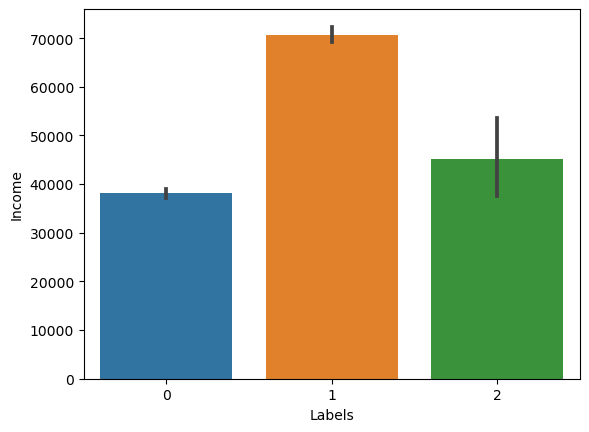

In [99]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


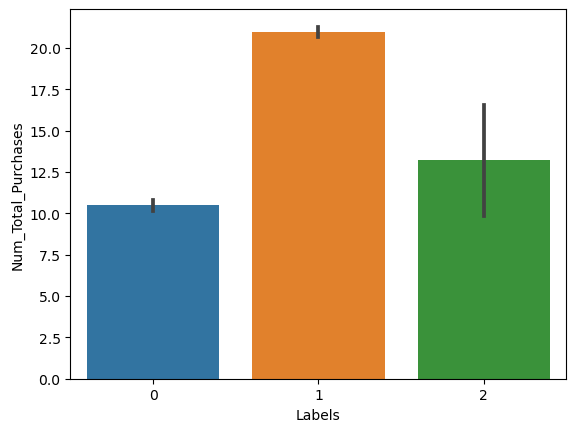

In [100]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

In [101]:
## The total number of purchases is also much higher for the cluster 1 as compared to cluster 0 and 2
## We can conclude that the customers belong to cluster 1 does maximum purchases, has spend maximum amount and have maximum income
## Where customers belong to cluster 0 has least total expenses and minimum balance and minimum purchases compared to other two clusters
## Customers belong to cluster 2 does average purchase, has average income.

-----
## Happy Learning
-----